In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Using the online material

The following files are provided:
- **Table2_flaring_star_catalog.csv**: catalog of flaring stars, 15130 lines
- **Table3_flare_catalog.csv**: flare catalog, only including the correctly extracted events, 121895 lines
- Table3_flare_catalog_not_extracted.csv: leftover flare catalog, only including the incorrectly extracted events, 14649 lines
- **TESS_interpolated_flare_shapes.dat**: scaled flare shapes, interpolated to 200 points, 121895 lines
- TESS_original_flare_shapes_time.dat: times for the scaled, but not interpolated flares, 121895 lines
- TESS_original_flare_shapes_flux.dat: fluxes for the scaled, but not interpolated flares, 121895 lines
- **Table6_solar_flare_catalog.csv**: catalog of solar flares from SDO/EVE, 539 lines
- **solar_flare_shapes.dat**: scaled solar flare shapes, interpolated to 1000 points, 539 lines

# Stellar flares from TESS

Each scaled profile in *flare_shapes* corresponds to an entry in *flare_catalog*, the same indexing can be used for both.

In [2]:
flare_time = np.linspace(-3, 10, num=200) # time bins for the scaled and interpolated flare profiles
flare_shapes = np.loadtxt('TESS_interpolated_flare_shapes.dat') # scaled and interpolated flare profiles

flaring_star_catalog = pd.read_csv('Table2_flaring_star_catalog.csv')
flare_catalog = pd.read_csv('Table3_flare_catalog.csv')
flare_catalog = pd.merge(flare_catalog, flaring_star_catalog, how='left', on='TIC') # merge the two tables for easier use

leftover_flare_catalog = pd.read_csv('Table3_flare_catalog_not_extracted.csv') # unsuccessfully extracted flares, most columns are omitted, might be useful for something

### Plot a color-magnitude diagram

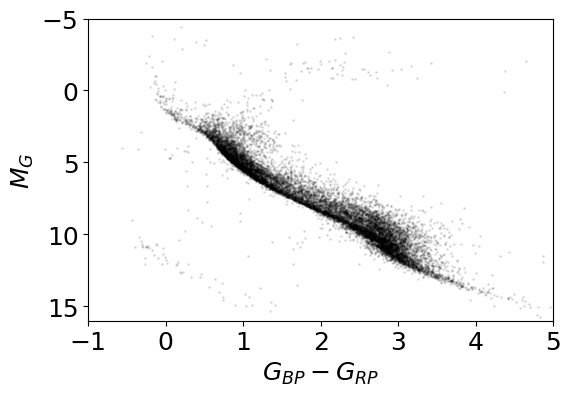

In [3]:
plt.xlabel(r'$G_{BP}-G_{RP}$')
plt.ylabel(r'$M_G$')
plt.xlim(-1, 5)
plt.ylim(16, -5)
plt.scatter(flaring_star_catalog['bp_rp'], flaring_star_catalog['abs_G_mag'], s=1, c='k', alpha=0.1)

### Plot a single scaled stellar flare, and print the corresponding parameters

TIC                     1.606358e+08
sector                  1.100000e+01
peak_time               1.617380e+03
timescale               6.791000e+00
amplitude               2.160000e-02
ED                      2.523600e-01
TESS_energy             8.510000e+32
bp_rp                   2.004000e+00
abs_G_mag               8.149000e+00
Teff                    3.767000e+03
logg                    4.647000e+00
quiescent_luminosity    5.617000e+31
num_flares              6.000000e+00
num_sectors             2.000000e+00
Name: 4200, dtype: float64

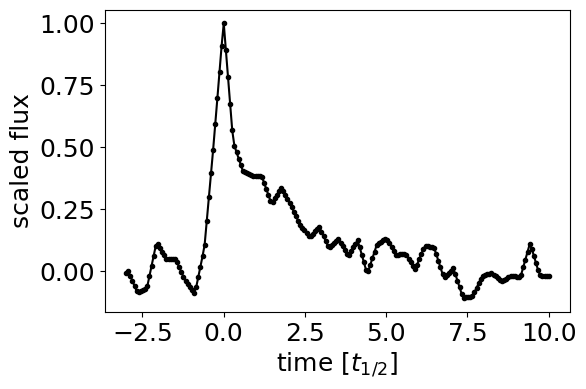

In [4]:
i = 4200

plt.xlabel(r'time [$t_{1/2}$]')
plt.ylabel('scaled flux')
plt.plot(flare_time, flare_shapes[i], 'k.-')

flare_catalog.iloc[i]

### Plot the average flare shapes of stars with different effective temperatures

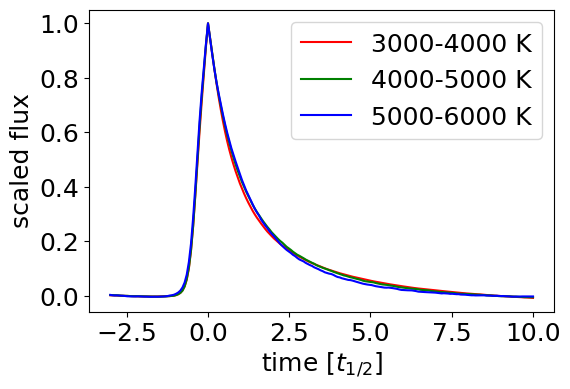

In [5]:
plt.xlabel(r'time [$t_{1/2}$]')
plt.ylabel('scaled flux')

w = (flare_catalog['Teff'] > 3000) & (flare_catalog['Teff'] < 4000)
plt.plot(flare_time, np.median(flare_shapes[w], axis=0), 'r-', label='3000-4000 K')

w = (flare_catalog['Teff'] > 4000) & (flare_catalog['Teff'] < 5000)
plt.plot(flare_time, np.median(flare_shapes[w], axis=0), 'g-', label='4000-5000 K')

w = (flare_catalog['Teff'] > 5000) & (flare_catalog['Teff'] < 6000)
plt.plot(flare_time, np.median(flare_shapes[w], axis=0), 'b-', label='5000-6000 K')

plt.legend()

### Read the scaled, but not interpolated flare shapes
Reading is slightly more involved, as each row contains different number of columns. Again, the same indexing can be used as in *flare_catalog*.

In [6]:
with open('TESS_original_flare_shapes_time.dat', 'r') as f:
    raw_data = [line.split() for line in f]
    
flare_shape_times = np.array([np.array(row, dtype=float) for row in raw_data], dtype=object)


with open('TESS_original_flare_shapes_flux.dat', 'r') as f:
    raw_data = [line.split() for line in f]
    
flare_shape_fluxes = np.array([np.array(row, dtype=float) for row in raw_data], dtype=object)

### Plot a scaled flare before and after linear interpolation

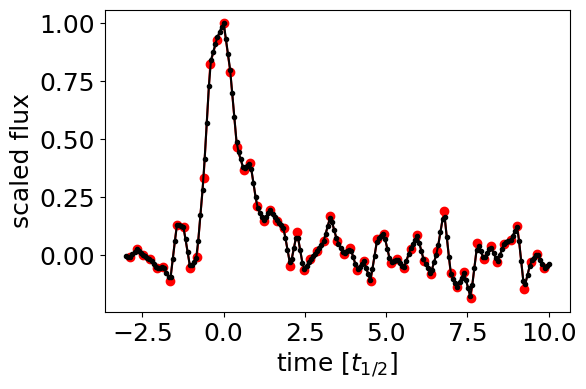

In [7]:
i = 42

plt.xlabel(r'time [$t_{1/2}$]')
plt.ylabel('scaled flux')
plt.plot(flare_shape_times[i], flare_shape_fluxes[i], 'ro-')
plt.plot(flare_time, flare_shapes[i], 'k.-')

# Solar flares from SDO/EVE

In [8]:
solar_flare_time = np.linspace(-2, 6, 1000)
solar_flare_shapes = np.loadtxt('solar_flare_shapes.dat')
solar_flare_catalog = pd.read_csv('Table6_solar_flare_catalog.csv')

### Plot a single scaled solar flare

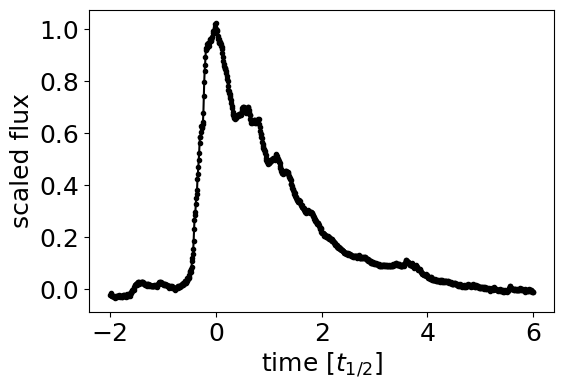

In [9]:
plt.xlabel(r'time [$t_{1/2}$]')
plt.ylabel('scaled flux')
plt.plot(solar_flare_time, solar_flare_shapes[42], 'k.-')

### Plot the average shape of solar flares with and without CME

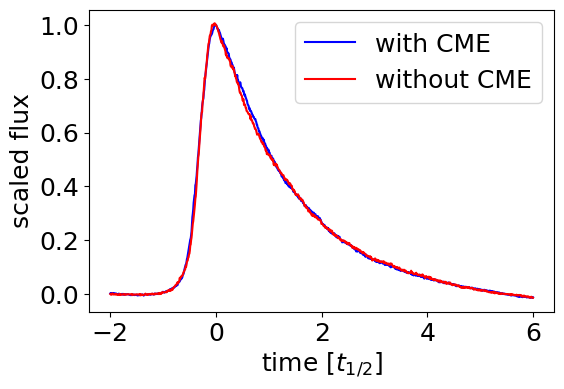

In [10]:
plt.xlabel(r'time [$t_{1/2}$]')
plt.ylabel('scaled flux')
plt.plot(solar_flare_time, np.median(solar_flare_shapes[solar_flare_catalog['CME'] == 'yes'], axis=0), 'b-', label='with CME')
plt.plot(solar_flare_time, np.median(solar_flare_shapes[solar_flare_catalog['CME'] == 'no'], axis=0), 'r-', label='without CME')
plt.legend()